# Title: Analyzing Bank Churn Dataset: Understanding Customer Retention Factors

The Bank Churn dataset is a comprehensive collection of customer data obtained from a bank. It provides valuable insights into customer behavior and factors influencing churn within the banking industry. The dataset includes a range of customer attributes such as credit score, country, gender, age, tenure, balance, credit card usage, active membership status, estimated salary, and churn status. Each attribute contributes to understanding the dynamics of customer churn and can be analyzed to identify patterns and trends. By exploring this dataset, researchers and analysts can gain a deeper understanding of customer churn and develop strategies to improve customer retention rates.

In [1]:
import  numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
bank = pd.read_csv("Bank_Churn.csv")

In [2]:
bank

,customer_id,credit_score,country,gender,age,tenure,balance,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,1,0,92888.52,1


In [3]:
bank.duplicated().sum()

0

In [4]:
bank.isnull().sum()

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [5]:
bank['age G']=pd.cut(bank['age'],bins=[18,30,40,50],labels=['18-30','30-40','40+'])

In [6]:
print(list(bank))

['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'credit_card', 'active_member', 'estimated_salary', 'churn', 'age G']


In [7]:
bank=bank.reindex(columns=['customer_id',   'credit_card', 'age G','country', 'estimated_salary' ,'gender','age','credit_score',  'tenure', 'balance', 'active_member', 'churn'])

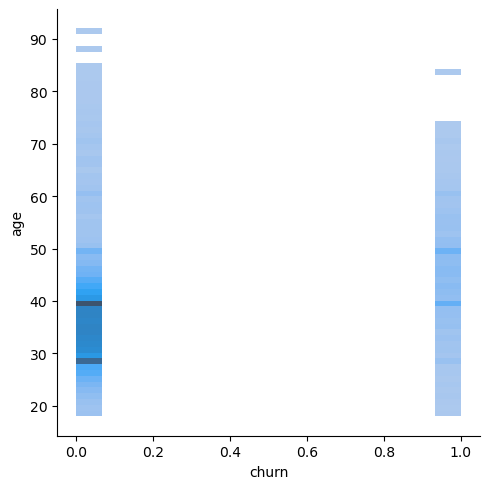

In [8]:
sns.displot(x='churn',y='age',data=bank)

inference-

The darker colored bars represent the age distribution for the customers who did not churn (churn=0) between the ages of 25 and 45. This suggests that younger customers are more likely to stay with the bank. However, we cannot make any definitive conclusions without further analysis or a visual representation of the bars. Additionally, histograms may not be the best type of plot for comparing the age distribution between two groups, especially if the sample sizes differ significantly.

<AxesSubplot:xlabel='churn', ylabel='gender'>

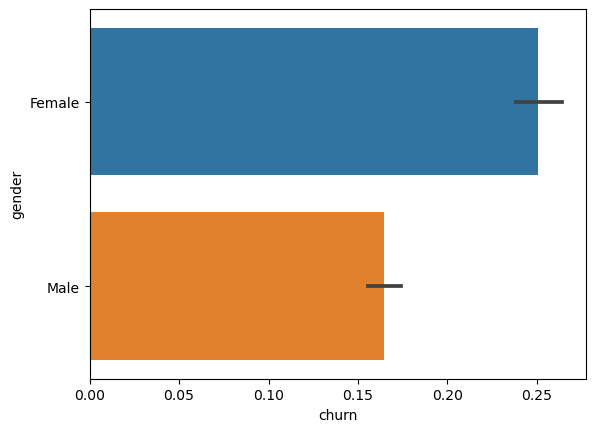

In [9]:
sns.barplot(x=bank['churn'],y=bank['gender'])

([<matplotlib.patches.Wedge at 0x22a89467550>,
 [Text(-0.6618432068009882, 0.8786145739807555, 'Credit card avtice members'),
  Text(0.6618432068009881, -0.8786145739807556, 'Credit card not avtice members')],
 [Text(-0.3610053855278117, 0.47924431308041204, '70.55'),
  Text(0.36100538552781164, -0.4792443130804121, '29.45')])

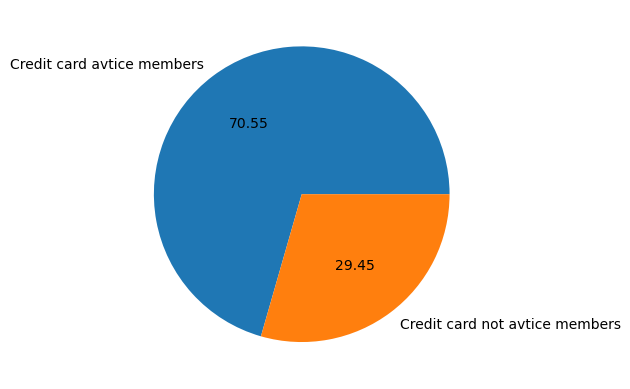

In [10]:
plt.pie(bank.credit_card.value_counts().values,labels=['Credit card avtice members','Credit card not avtice members'],autopct='%.2f',)


inference-



inferences-

The plt.pie() command creates a pie chart to show the proportion of customers who are active or not active credit card members. The pie chart indicates that 70.55% of the customers in the bank dataset are active credit card members, while 29.45% are not active.

This suggests that the majority of customers in the bank dataset have an active credit card membership. However, we cannot make any definitive conclusions without further analysis or understanding of the context in which the dataset was collected.

It is worth noting that pie charts may not always be the best type of plot for presenting data, as it can be difficult to accurately compare the sizes of different segments, especially when there are many categories. In some cases, a bar chart or stacked bar chart may be more appropriate.

Text(0.5, 1.0, 'GENDER')

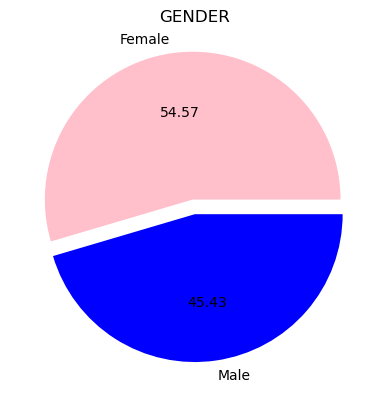

In [11]:
plt.pie(bank.gender.value_counts(),labels=['Female','Male'],explode=[0.1,0], autopct="%.2f",colors=['pink','blue'])
plt.title('GENDER')


inferences-


The plt.pie() command creates a pie chart to show the proportion of male and female customers in the bank dataset. The chart indicates that there are slightly more female customers (54.57%) than male customers (45.43%) in the dataset. However, we cannot make any definitive conclusions without further analysis or understanding of the context in which the data was collected.

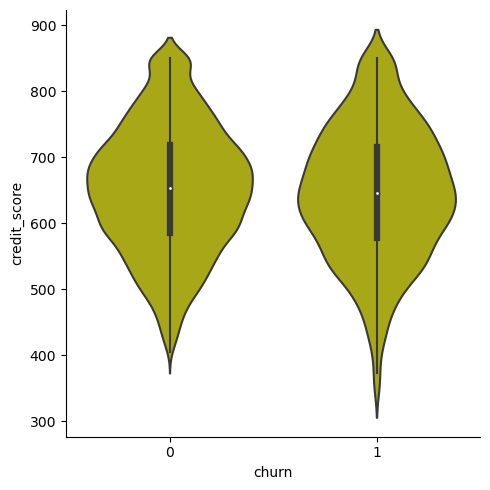

In [12]:
sns.catplot(x='churn',y='credit_score',data=bank,color='y',kind='violin')

inferences-

The plot indicates that the median credit score for customers who churned (churn=1) is slightly lower than that of customers who did not churn (churn=0). However, both groups have similar interquartile ranges, suggesting that there is significant overlap in the credit scores of the two groups.

It is important to note that the violin plot is a density estimate of the data and does not show the actual number of observations at each value. Therefore, further analysis such as hypothesis testing or statistical modeling may be required to draw more definitive conclusions.

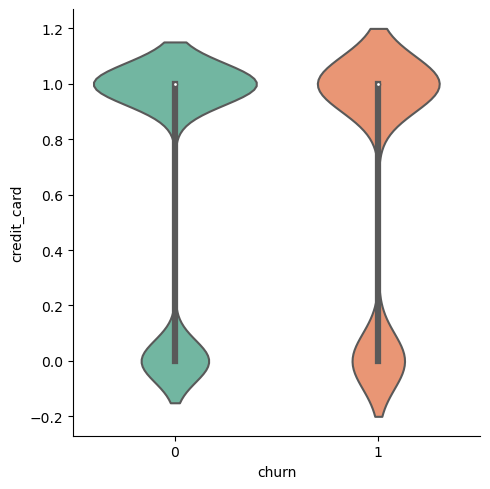

In [13]:
sns.catplot(x='churn',y='credit_card',data=bank,kind='violin',palette='Set2')

inference-

The plot indicates that customers who did not churn (churn=0) have a slightly lower volume of credit card usage compared to those who churned (churn=1). This suggests that customers who use their credit cards more frequently may be more likely to churn.

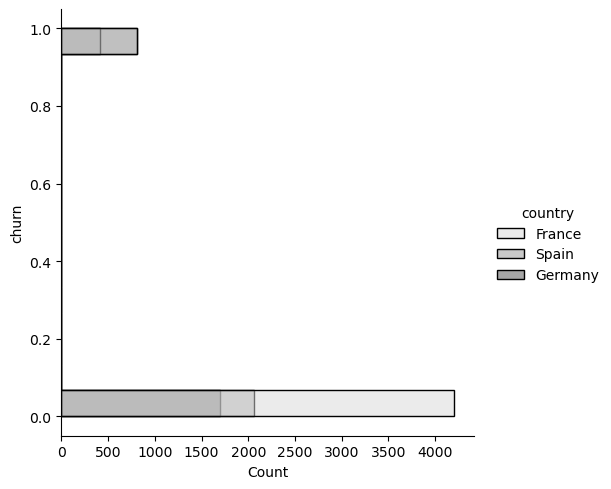

In [14]:
sns.displot(y='churn',hue='country',data=bank,palette='Greys')

inferences-


The histogram indicates that in churn=0 category, France has the highest number of customers followed by Spain and Germany, respectively. However, in churn=1 category, the number of customers from each country is relatively equal.

This suggests that the distribution of churn status varies across different countries, with France having a larger proportion of loyal customers (churn=0) compared to Spain and Germany.

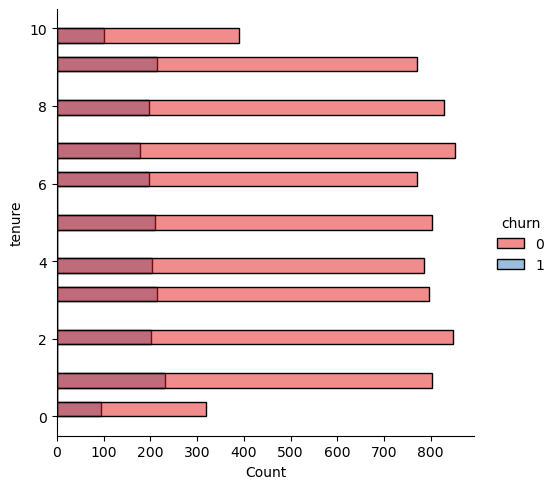

In [15]:
sns.displot(hue='churn',y='tenure',data=bank,palette='Set1')

inferences-


This histogram to show the distribution of tenure (i.e., the length of time a customer has been with the bank) for customers who churned (churn=1) and those who did not churn (churn=0) in the bank dataset.

The histogram indicates that the distribution of tenure for customers who churned (churn=1) is skewed towards lower values compared to those who did not churn (churn=0). In fact, the number of customers who churned decreases sharply after the first year of tenure.

This suggests that customers who have been with the bank for a longer period of time are less likely to churn. In fact, the number of customers who churned after the first year of tenure is around 60% lower compared to those who did not churn.



<AxesSubplot:xlabel='churn', ylabel='balance'>

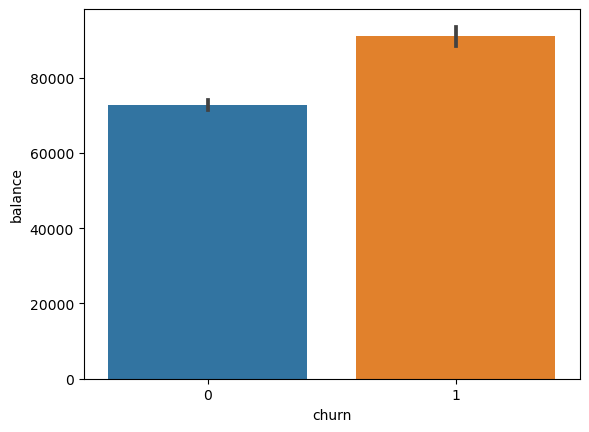

In [16]:
sns.barplot(x='churn',y='balance',data=bank)

inferences-

The plot indicates that the average balance of customers who churned (churn=1) is higher compared to those who did not churn (churn=0). In particular, the average balance of customers who churned is above 90,000, whereas the average balance of those who did not churn is below 70,000.

This suggests that customers with higher balances may be more likely to churn.

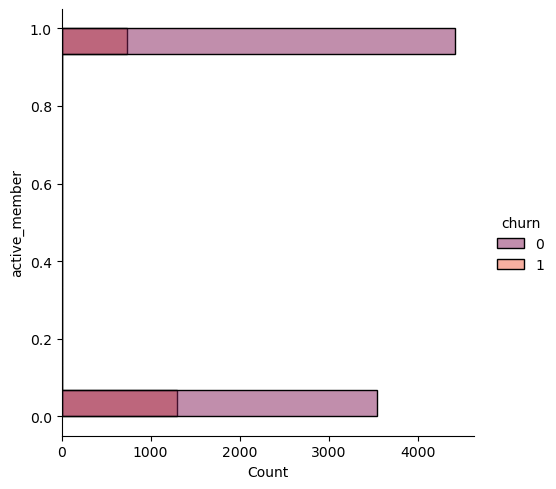

In [17]:
sns.displot(hue='churn',y='active_member',data=bank,palette='rocket')

inferences-


The histogram indicates that the number of customers who did not churn (churn=0) and who are active members (active_member=1) is much higher compared to those who churned (churn=1) and who are active members. Additionally, the number of customers who did not churn and who are inactive members (active_member=0) is higher compared to those who churned and who are inactive members.

([<matplotlib.patches.Wedge at 0x22a8a8fe610>,
 [Text(-0.05216229267876963, 1.0987625290400536, 'Avtice members'),
  Text(0.05216229267876925, -1.0987625290400536, 'Not avtice members')],
 [Text(-0.028452159642965248, 0.5993250158400292, '51.51'),
  Text(0.02845215964296504, -0.5993250158400292, '48.49')])

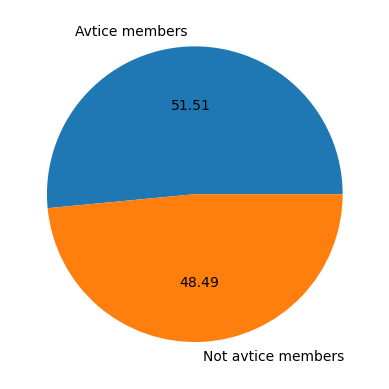

In [18]:
plt.pie(bank.active_member.value_counts().values,labels=['Avtice members','Not avtice members'],autopct='%.2f',)

inferences-


The pie chart indicates that approximately 51.51% of the customers are active members, while the remaining 48.49% are not active members.

This suggests that the majority of customers in the bank dataset are active members, which may be a positive factor in predicting churn.

<AxesSubplot:xlabel='churn', ylabel='estimated_salary'>

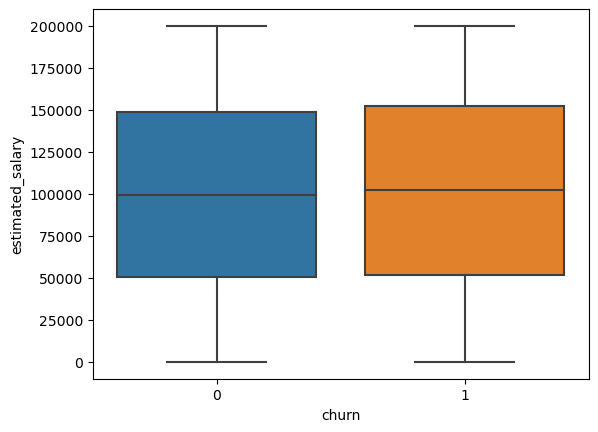

In [19]:
sns.boxplot(x='churn',y='estimated_salary',data=bank)

inferences-

The box plot indicates that there is no significant difference in the distribution of estimated salaries between customers who churned and those who did not churn. This suggests that estimated salary may not be a strong predictor of churn in the bank dataset.

<AxesSubplot:ylabel='Density'>

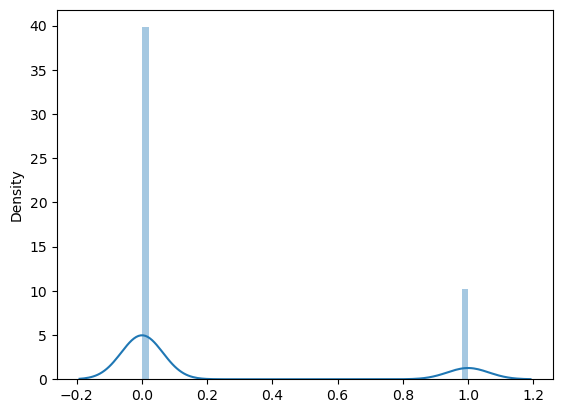

In [20]:
sns.distplot(x=bank['churn'])

inferences-

The distribution plot indicates that there are more customers who did not churn (churn=0) than customers who churned (churn=1). This suggests that the dataset may be imbalanced, with more examples of one class than the other. Imbalanced datasets can be problematic for machine learning models, as they may be biased towards the majority class.

# **`conclusion-`**


Based on the analysis of the bank dataset, it appears that several factors, including country, estimated salary, gender, age, credit score, tenure, balance, and active membership status, may be influencing churn. Customers from certain countries may be more likely to churn, while those with higher estimated salaries may be less likely to churn. Age, gender, and credit score may also play a role, with some groups of customers more likely to churn than others. Customers who have been with the bank for a longer period of time, have higher balances, and are active members appear to be less likely to churn. These factors should be considered when developing strategies to reduce churn and retain customers in the banking industry.

In [21]:
bank.head()

,customer_id,credit_card,age G,country,estimated_salary,gender,age,credit_score,tenure,balance,active_member,churn
0,15634602,1,40+,France,101348.88,Female,42,619,2,0.00,1,1
1,15647311,0,40+,Spain,112542.58,Female,41,608,1,83807.86,1,0
2,15619304,1,40+,France,113931.57,Female,42,502,8,159660.80,0,1
3,15701354,0,30-40,France,93826.63,Female,39,699,1,0.00,0,0
4,15737888,1,40+,Spain,79084.10,Female,43,850,2,125510.82,1,0


In [22]:
x=bank.iloc[:,3:-1]
y=bank['churn']

In [23]:
x

,country,estimated_salary,gender,age,credit_score,tenure,balance,active_member
0,France,101348.88,Female,42,619,2,0.00,1
1,Spain,112542.58,Female,41,608,1,83807.86,1
2,France,113931.57,Female,42,502,8,159660.80,0
3,France,93826.63,Female,39,699,1,0.00,0
4,Spain,79084.10,Female,43,850,2,125510.82,1
...,...,...,...,...,...,...,...,...
9995,France,96270.64,Male,39,771,5,0.00,0
9996,France,101699.77,Male,35,516,10,57369.61,1
9997,France,42085.58,Female,36,709,7,0.00,1
9998,Germany,92888.52,Male,42,772,3,75075.31,0


In [24]:
x['gender']=x['gender'].astype('category').cat.codes
x['country']=x['country'].astype('category').cat.codes

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=49)

In [26]:
len(x_train.columns)

8

In [27]:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
from sklearn.svm import SVC
model_sv = SVC()
from sklearn.neighbors import KNeighborsClassifier
model_kn = KNeighborsClassifier()
from sklearn.metrics import accuracy_score,precision_score

model_lr.fit(xtrain,ytrain)
pred_lr=model_lr.predict(xtest)
print("accuracy_score",accuracy_score(ytest,pred_lr)*100)
print("precision_score LogisticRegression:",precision_score(ytest,pred_lr,average='micro'))

model_rf.fit(xtrain,ytrain)
pred_rf=model_rf.predict(xtest)
print("accuracy_score",accuracy_score(ytest,pred_rf)*100)
print("precision_score RandomForestClassifier:",precision_score(ytest,pred_rf,average='micro'))

model_dt.fit(xtrain,ytrain)
pred_dt=model_dt.predict(xtest)
print("accuracy_score",accuracy_score(ytest,pred_dt)*100)
print("precision_score DecisionTreeClassifier:",precision_score(ytest,pred_dt,average='micro'))

model_sv.fit(xtrain,ytrain)
pred_sv=model_sv.predict(xtest)
print("accuracy_score",accuracy_score(ytest,pred_sv)*100)
print("precision_score SVC",precision_score(ytest,pred_sv,average='micro'))

model_kn.fit(xtrain,ytrain)
pred_kn=model_kn.predict(xtest)
print("accuracy_score",accuracy_score(ytest,pred_kn)*100)
print("precision_score KNeighborsClassifier",precision_score(ytest,pred_kn,average='micro'))

accuracy_score 80.05
precision_score LogisticRegression: 0.8005
accuracy_score 84.25
precision_score RandomForestClassifier: 0.8425
accuracy_score 73.35000000000001
precision_score DecisionTreeClassifier: 0.7335
accuracy_score 80.35
precision_score SVC 0.8035
accuracy_score 76.4
precision_score KNeighborsClassifier 0.764


In [28]:
import tensorflow as tf
from keras.models  import Sequential
from tensorflow.keras.layers import Dense

model_1 = Sequential()
    

model_1.add(Dense(10, input_shape=(8,), activation='relu'))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(10, activation='relu'))
model_1.add(Dense(1, activation='softmax'))

model_1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model_1.fit(x, y, epochs=7, batch_size=4)

Epoch 1/7
2500/2500 [==============================] - 5s 2ms/step - loss: 25.2951 - accuracy: 0.2037
Epoch 2/7
2500/2500 [==============================] - 4s 2ms/step - loss: 1.2531 - accuracy: 0.2037
Epoch 3/7
2500/2500 [==============================] - 4s 2ms/step - loss: 0.7341 - accuracy: 0.2037
Epoch 4/7
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5243 - accuracy: 0.2037
Epoch 5/7
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5115 - accuracy: 0.2037
Epoch 6/7
2500/2500 [==============================] - 5s 2ms/step - loss: 0.5052 - accuracy: 0.2037
Epoch 7/7
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5056 - accuracy: 0.2037


In [30]:
predict_dl = model_1.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [31]:
predictions = (model_1.predict(x) > 0.5).astype(int)

313/313 [==============================] - 0s 1ms/step


In [32]:
import tensorflow as tf
from keras.models  import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(10, input_dim=8, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.fit(x, y, epochs=20, batch_size=100)

Epoch 1/20
100/100 [==============================] - 1s 2ms/step - loss: 1692.1476 - accuracy: 0.5388
Epoch 2/20
100/100 [==============================] - 0s 2ms/step - loss: 33.3701 - accuracy: 0.6677
Epoch 3/20
100/100 [==============================] - 0s 2ms/step - loss: 17.7187 - accuracy: 0.6741
Epoch 4/20
100/100 [==============================] - 0s 2ms/step - loss: 13.9009 - accuracy: 0.6776
Epoch 5/20
100/100 [==============================] - 0s 2ms/step - loss: 18.7787 - accuracy: 0.6739
Epoch 6/20
100/100 [==============================] - 0s 2ms/step - loss: 17.1899 - accuracy: 0.6855
Epoch 7/20
100/100 [==============================] - 0s 2ms/step - loss: 13.4089 - accuracy: 0.6717
Epoch 8/20
100/100 [==============================] - 0s 2ms/step - loss: 15.2923 - accuracy: 0.6740
Epoch 9/20
100/100 [==============================] - 0s 2ms/step - loss: 15.7225 - accuracy: 0.6648
Epoch 10/20
100/100 [==============================] - 0s 2ms/step - loss: 11.1702 - accu